In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from imblearn.combine import SMOTEENN
import sys
from ml_template.utils import *
from ml_template.model.ml_model import *
data_df = pd.read_csv('data/train.csv',sep='\t',header=None)
test_df = pd.read_csv('data/test.csv',sep='\t',header=None)

In [2]:
data = data_df.values[:,:-1]
label=(data_df.values[:,-1]+1)//2
qt = QuantileTransformer(n_quantiles=10)
data = qt.fit_transform(data)

In [3]:
# split 9:1 
train_data, train_label, test_data, test_label = KFold_Sampler(data,label,n_splits=10).get_multi_fold(n_fold=1)
print(len(train_data),len(test_data),len(test_data)/(len(train_data)+len(test_data)))

# define model list
model_lgb = lgb.LGBMClassifier(is_unbalance=True)

model_dict = {'RF_3':RandomForestClassifier(n_estimators=310,max_depth=3),
              'RF_depth_None':RandomForestClassifier(n_estimators=310),
              'XGB_31_3':XGBClassifier(n_estimators=31,max_depth=3),
              'XGB_310_3':XGBClassifier(n_estimators=31,max_depth=3),
              'XGB_31':XGBClassifier(n_estimators=31),
              'XGB_310':XGBClassifier(n_estimators=310),
              'SVM':SVC(probability=True),
              'SVM_lin':SVC(kernel='linear',probability=True),
              'SVM_rbf':SVC(kernel='rbf',probability=True),
              'SVM_0.2':SVC(C=0.2,probability=True),
              'SVM_0.2_lin':SVC(C=0.2,kernel='linear',probability=True),
              'SVM_0.2_poly':SVC(C=0.2,kernel='poly',probability=True),
              'SVM_5':SVC(C=5,probability=True),
              'SVM_5_lin':SVC(C=5,kernel='linear',probability=True),
              'SVM_5_poly':SVC(C=5,kernel='poly',probability=True),
              # 'KNN_Cls':KNeighborsClassifier(),
              # 'LGB_Cls':model_lgb,
              # 'Ridge_Cls':RidgeClassifier(),
              # 'MLP_Cls':MLPClassifier(activation = "relu", alpha = 0.001, hidden_layer_sizes = (56,10),
              #               learning_rate = "constant", max_iter = 3000, random_state = 3000,early_stopping=True),
              # 'QDA':QuadraticDiscriminantAnalysis(),
              }
#stack_model=MLPClassifier(activation = "relu", alpha = 0.0001,validation_fraction=0.1, hidden_layer_sizes = (38),learning_rate = "constant", max_iter = 3000, random_state = 1000,early_stopping=True)
# stack_model=SVC(C=1,kernel='linear', probability=True)
#stack_model = DecisionTreeClassifier()
num_model = len(list(model_dict.keys()))
num_classes=2
stack_model=ML_Weighted_Model(num_model,
                              num_classes,
                              epoch=1000,
                              model_reg=0.00,
                              classes_reg=0.00,
                              l1_norm=0.00)
model = Stack_Ensemble_Proba_Model(copy.deepcopy(model_dict),stack_model=stack_model,stack_training_split=0.2)
# model = Mean_Ensemble_Proba_Model(copy.deepcopy(model_dict))
cv_model, cv_df = model.cross_validation_evaluate(train_data, train_label, accuracy_score,n_splits=5)

90 10 0.1
----- Model pre-training evaluation -----
            model  eval_metric
0   RF_depth_None     0.200000
1           SVM_5     0.200000
2            RF_3     0.266667
3        XGB_31_3     0.266667
4       XGB_310_3     0.266667
5          XGB_31     0.266667
6         XGB_310     0.266667
7             SVM     0.266667
8         SVM_lin     0.266667
9         SVM_rbf     0.266667
10   SVM_0.2_poly     0.266667
11      SVM_5_lin     0.400000
12     SVM_5_poly     0.400000
13        SVM_0.2     0.466667
14    SVM_0.2_lin     0.533333
----- Stacking weights -----
0      RF_3      : ['0.000', '0.000']
1  RF_depth_None : ['0.000', '0.000']
2    XGB_31_3    : ['0.281', '0.281']
3    XGB_310_3   : ['0.281', '0.281']
4     XGB_31     : ['0.202', '0.202']
5     XGB_310    : ['0.236', '0.236']
6       SVM      : ['0.000', '0.000']
7     SVM_lin    : ['0.000', '0.000']
8     SVM_rbf    : ['0.000', '0.000']
9     SVM_0.2    : ['0.000', '0.000']
10  SVM_0.2_lin  : ['0.000', '0.000']
11 SV

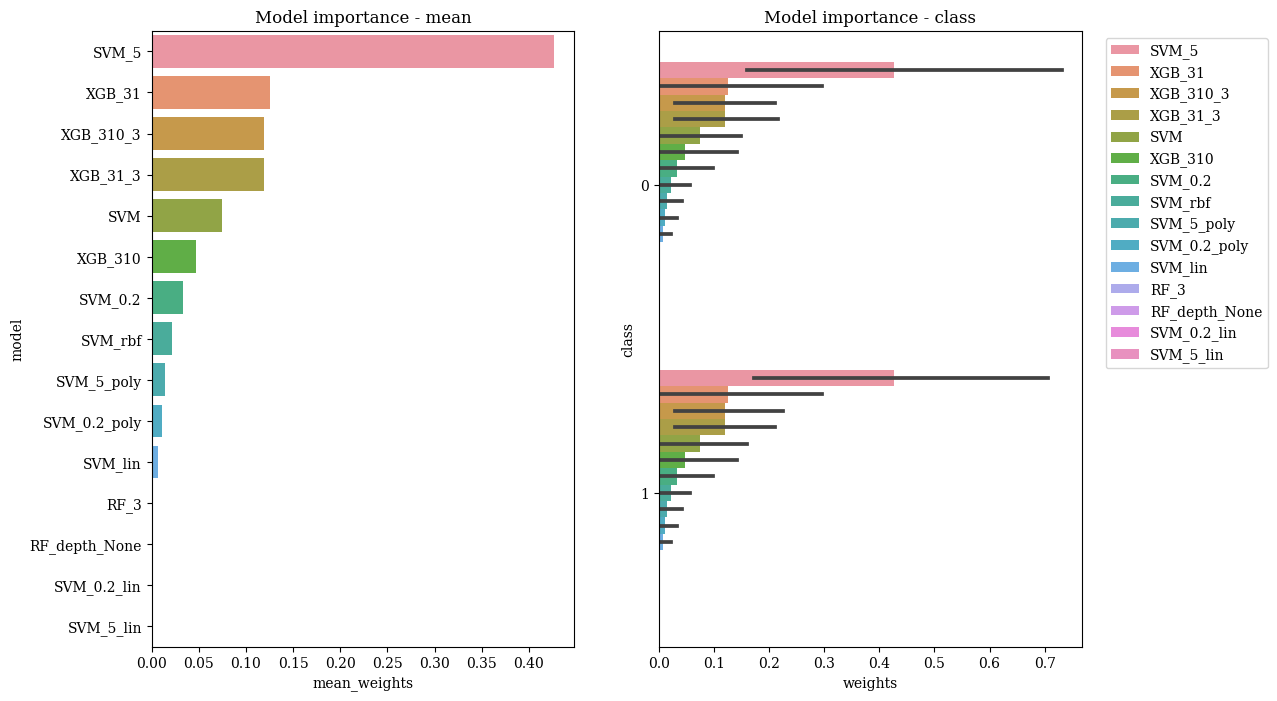

=========== Model Classes Importance ============
model
SVM_5            0.4268
XGB_31           0.1256
XGB_310_3        0.1196
XGB_31_3         0.1196
SVM              0.0746
XGB_310          0.0472
SVM_0.2          0.0330
SVM_rbf          0.0214
SVM_5_poly       0.0142
SVM_0.2_poly     0.0110
SVM_lin          0.0072
RF_3             0.0000
RF_depth_None    0.0000
SVM_0.2_lin      0.0000
SVM_5_lin        0.0000
Name: weights, dtype: float32
                     weights
class model                 
0     SVM_5           0.4268
      XGB_31          0.1256
      XGB_310_3       0.1196
      XGB_31_3        0.1196
      SVM             0.0746
      XGB_310         0.0472
      SVM_0.2         0.0330
      SVM_rbf         0.0214
      SVM_5_poly      0.0142
      SVM_0.2_poly    0.0110
      SVM_lin         0.0072
      RF_3            0.0000
      RF_depth_None   0.0000
      SVM_0.2_lin     0.0000
      SVM_5_lin       0.0000
1     SVM_5           0.4268
      XGB_31          0.1256
   

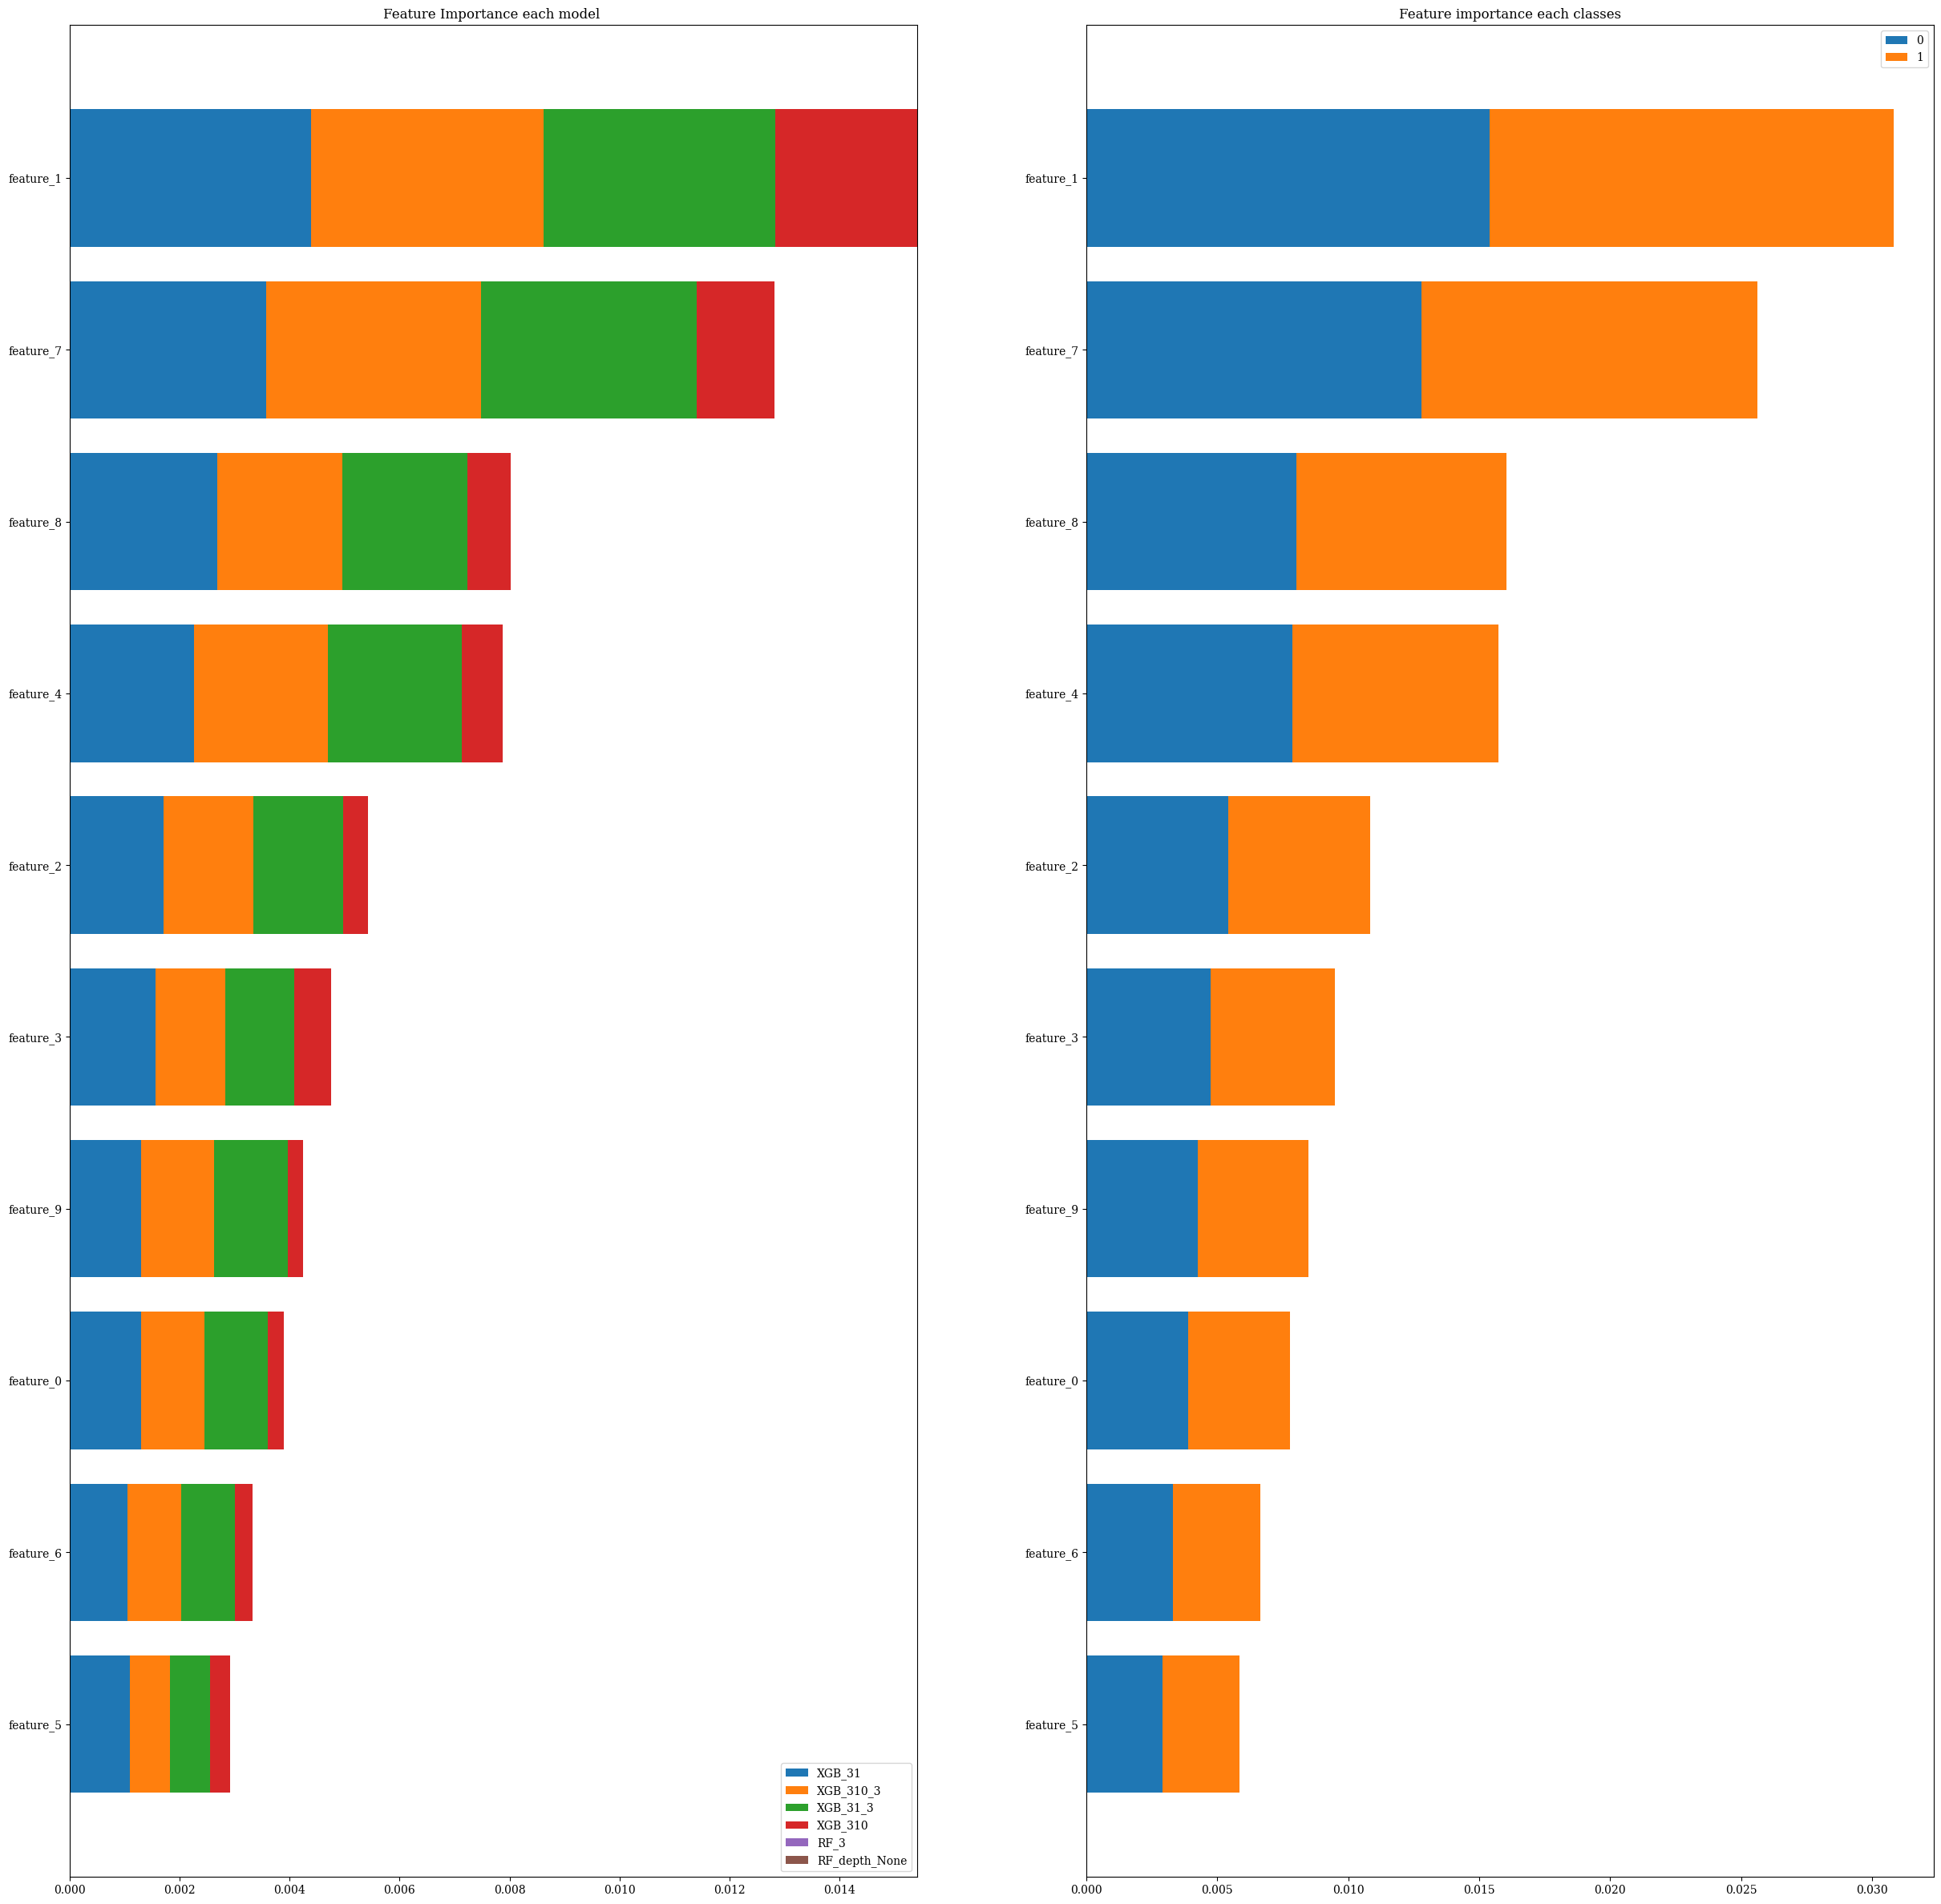

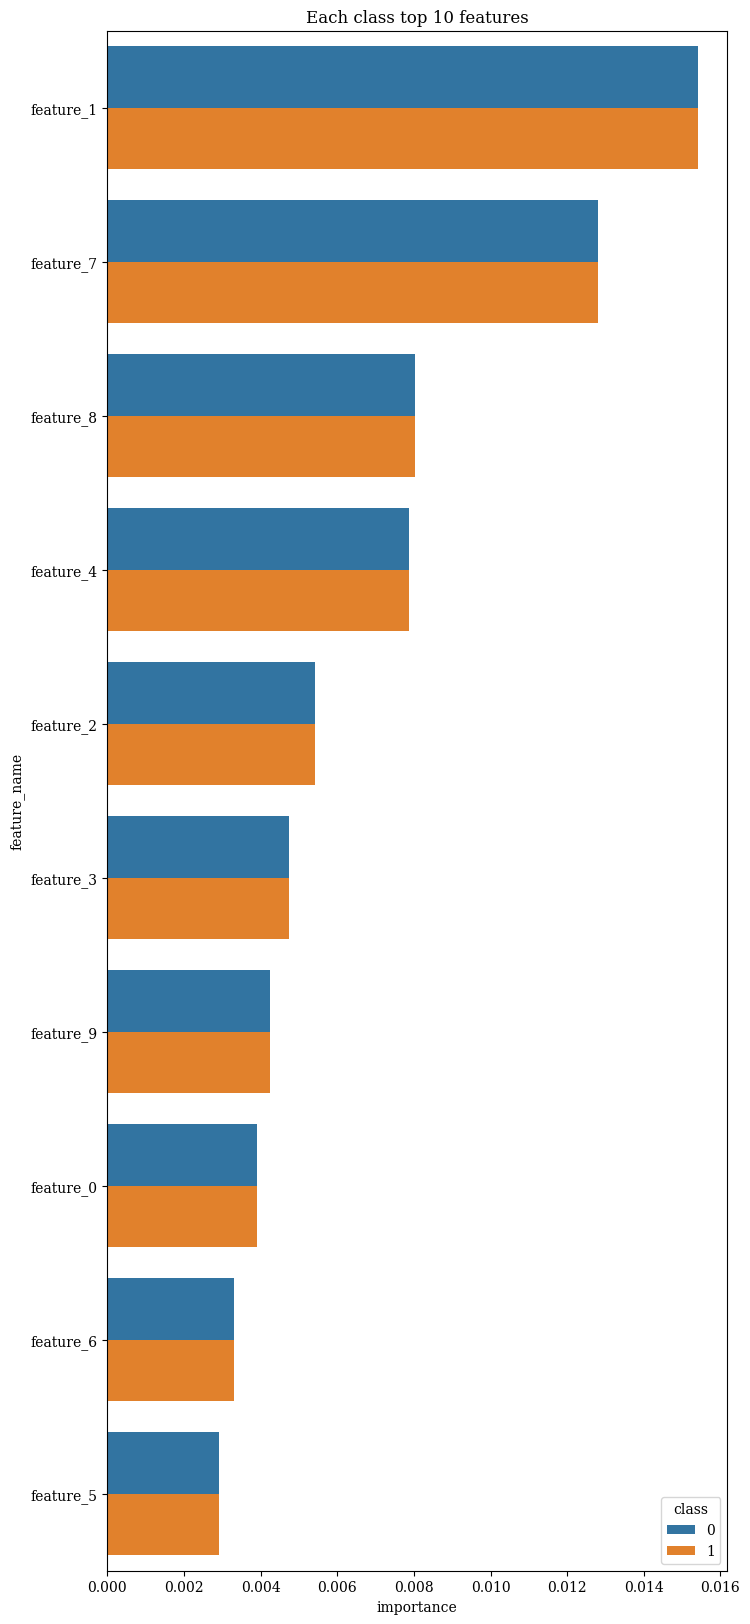

   class feature_name  importance  mean_importance
0      0    feature_1    0.015407         0.015407
3      0    feature_7    0.012811         0.012811
5      0    feature_8    0.008026         0.008026
6      0    feature_4    0.007868         0.007868
8      0    feature_2    0.005424         0.005424
10     0    feature_3    0.004752         0.004752
12     0    feature_9    0.004247         0.004247
14     0    feature_0    0.003895         0.003895
16     0    feature_6    0.003319         0.003319
18     0    feature_5    0.002917         0.002917
1      1    feature_1    0.015407         0.015407
2      1    feature_7    0.012811         0.012811
4      1    feature_8    0.008026         0.008026
7      1    feature_4    0.007868         0.007868
9      1    feature_2    0.005424         0.005424
11     1    feature_3    0.004752         0.004752
13     1    feature_9    0.004247         0.004247
15     1    feature_0    0.003895         0.003895
17     1    feature_6    0.0033

In [4]:
stacking_analysis_df = weighted_stacking_analysis(cv_model, [f'feature_{i}'for i in range(10)])

In [5]:

#stack_model = DecisionTreeClassifier()
# cv_ensemble_model = Stack_Ensemble_Proba_Model(model_dict=cv_model, stack_model=copy.deepcopy(stack_model), stack_training_split=0.3)
cv_ensemble_model = Mean_Ensemble_Proba_Model(cv_model)
# cv_ensemble_model.fit(train_data,train_label)
# # cv_ensemble_model.fit(train_data,train_label)
# print('========== Ensemble Model ==========')
# _=model.evaluate(test_data,test_label,evaluation_fn=accuracy_score,verbose=True)
print('========== CV Ensemble Model ==========')
_=cv_ensemble_model.evaluate(test_data,test_label,evaluation_fn=accuracy_score,verbose=True)

========== CV Ensemble Model ==========
            model  eval_metric
0         model_5          0.7
1         model_1          0.8
2         model_3          0.8
3         model_4          0.9
4         model_2          1.0
5  Ensemble Model          1.0


In [6]:
_=cv_ensemble_model.evaluate(train_data,train_label,accuracy_score)

            model  eval_metric
0         model_3     0.922222
1         model_4     0.933333
2         model_2     0.944444
3         model_5     0.944444
4         model_1     0.966667
5  Ensemble Model     1.000000


In [7]:
test_data = test_df.values[:,1:]
test_pred = cv_ensemble_model.predict(test_data)
test_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,